In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
subs = """title = re.sub(re.escape('[O][O] + 2 [Pt] <=> 2 O=[Pt]'), 'R1', title)
title = re.sub(re.escape('[H][H] + 2 [Pt] <=> 2 [Pt]'), 'R2', title)
title = re.sub(re.escape('[Pt] + O=[Pt] <=> O[Pt] + [Pt]'), 'R3', title)
title = re.sub(re.escape('C + 2 [Pt] <=> C[Pt] + [Pt]'), 'R4', title)
title = re.sub(re.escape('C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]'), 'R5', title)
title = re.sub(re.escape('C=[Pt] + [Pt] <=> C[Pt] + [Pt]'), 'R6', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C=[Pt] + [Pt]'), 'R7', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C~[Pt] + [Pt]'), 'R8', title)
title = re.sub(re.escape('C~[Pt] + [H][H] <=> C=[Pt]'), 'R9', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> O=C=[Pt]'), 'R10', title)
title = re.sub(re.escape('C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]'), 'R11', title)
title = re.sub(re.escape('C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]'), 'R12', title)
title = re.sub(re.escape('O + [Pt] <=> O.[Pt]'), 'R13', title)
title = re.sub(re.escape('O.[Pt] + O=[Pt] <=> 2 O[Pt]'), 'R14', title)
title = re.sub(re.escape('O[Pt] + [Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('[Pt] + O[Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('O=C=O + [Pt] <=> O=C=O.[Pt]'), 'R16', title)
title = re.sub(re.escape('O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]'), 'R17', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O[Pt] + O=C=[Pt]'), 'R18', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]'), 'R18', title)
title = re.sub(re.escape('C + [Pt] <=> C.[Pt]'), 'R19', title)
title = re.sub(re.escape('[H][H] + [Pt] <=> [H][H].[Pt]'), 'R20', title)
title = re.sub(re.escape('[H] + [Pt] <=> [Pt]'), 'R21', title)
title = re.sub(re.escape('[OH] + [Pt] <=> O[Pt]'), 'R22', title)
title = re.sub(re.escape('[CH3] + [Pt] <=> C[Pt]'), 'R23', title)
title = re.sub(re.escape('[CH]=O + [Pt] <=> O=C[Pt]'), 'R24', title)
title = re.sub(re.escape('O + 2 [Pt] <=> O[Pt] + [Pt]'), 'R25', title)
title = re.sub(re.escape('O + 2 [Pt] <=> [Pt] + O[Pt]'), 'R25', title)
title = re.sub(re.escape('CC + 2 [Pt] <=> 2 C[Pt]'), 'R26', title)
title = re.sub(re.escape('CO + 2 [Pt] <=> C[Pt] + O[Pt]'), 'R27', title)
title = re.sub(re.escape('C=O + 2 [Pt] <=> O=C[Pt] + [Pt]'), 'R28', title)
title = re.sub(re.escape('CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]'), 'R29', title)
title = re.sub(re.escape('[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]'), 'R30', title)
title = re.sub(re.escape('C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]'), 'R31', title)
title = re.sub(re.escape('C#[Pt] + O[Pt] <=> C=[Pt] + O=[Pt]'), 'R32', title)
title = re.sub(re.escape('2 C=[Pt] <=> C[Pt] + C#[Pt]'), 'R33', title)
title = re.sub(re.escape('C~[Pt] + O[Pt] <=> C#[Pt] + O=[Pt]'), 'R34', title)
title = re.sub(re.escape('C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]'), 'R35', title)
title = re.sub(re.escape('C=[Pt] + C~[Pt] <=> 2 C#[Pt]'), 'R36', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O[Pt] + O=C=[Pt]'), 'R37', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]'), 'R37', title)
title = re.sub(re.escape('C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]'), 'R38', title)
title = re.sub(re.escape('O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]'), 'R39', title)
title = re.sub(re.escape('O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]'), 'R40', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> [Pt] + O=C=[Pt]'), 'R41', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]'), 'R41', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]'), 'R', title)"""
translation = {}
for l in subs.split("\n"):
    reaction, label = l.lstrip("""title = re.sub(re.escape('""").strip(""", title)""").split("'), ")
    label = label.strip("'").lstrip("'")
    translation[reaction] = label

In [3]:
def import_sensitivities(ratio):
    """
    Ratio is the C/O starting gas ratio
    file_location is the LSR C and O binding energy, fasle to load the base case
    thermo is either False to load reaction sensitivities or True to load thermo sensitivities
    """
    data = pd.read_csv('./sensitivities/' + str(ratio) + 'RxnSensitivity.csv')
    data = data.values
    data = data.tolist()
    return data

In [4]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion', 'Max CH4 Conv', 'Dist to 50 CH4 Conv']
sens_dict = {}
for s in range(len(sens_types)):
    sens_dict[sens_types[s]] = s

sens_index = list(range(len(sens_types)))
ratios_index = list(range(len(ratios)))
sens_index_dict = dict(zip(sens_types, sens_index))
rev_sens_index_dict = dict(zip(sens_index, sens_types))
ratios_index_dict = dict(zip(ratios, ratios_index))
rev_ratios_index_dict = dict(zip(ratios_index, ratios))

In [5]:
sens_data = []
for r in ratios:
    sens_data.append(import_sensitivities(r))
sens_data

[[[0,
   '[H][H] + 2 [Pt] <=> 2 [Pt]',
   -0.0022789677122751163,
   -0.0022789662294231,
   -0.000816186743433338,
   -0.000816185260567908,
   -0.004131306129453556,
   -0.0041313046466340715,
   1.4828805134161053e-09,
   0.0072055165734927675,
   0.0072055180564838,
   0.0038044743179717158,
   0.0011585923116931099,
   0.07843137254900398,
   -8.669287560039848e-10,
   0.27092505270590217,
   0.07886435331231517],
  [1,
   'O=C=O + [Pt] <=> O=C=O.[Pt]',
   4.459999130452463e-10,
   4.45931327303916e-10,
   -6.325105743313253e-10,
   -6.325965203562236e-10,
   1.8117316607696176e-09,
   1.8116384217579101e-09,
   -7.771561320929531e-14,
   -5.241381849025634e-09,
   -5.241454773697664e-09,
   -2.849791247776989e-09,
   -6.140930845990079e-05,
   0.0,
   2.2204460620443738e-14,
   0.02533976582691952,
   0.0],
  [2,
   '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
   6.644314914982272e-10,
   6.644315041988389e-10,
   2.445311439571777e-10,
   2.4453114863139177e-10,
   1.1961722657695361e-09,
 

In [6]:
reactions = set()  # create list of unique reactions
for r in range(len(sens_data[0])):  # for each reaction
    reactions.add(sens_data[0][r][1])  # append the reaction itself
reactions = list(sens_data)

In [7]:
def calculate(data):
    ratio = data[1]
    ch4_in = data[2]
    ch4_out = data[3]
    co_out = data[4]
    h2_out = data[5]
    h2o_out = data[6]
    co2_out = data[7]
    exit_T = data[8]
    max_T = data[9]
    dist_Tmax = data[10]
    o2_conv = data[11]
    max_ch4_conv = data[12]
    dist_to_50_ch4_conv = data[13]

    ch4_depletion = ch4_in - ch4_out
    ch4_conv = ch4_depletion / ch4_in
    h2_sel = h2_out / (ch4_depletion * 2)
    h2_yield = h2_out / ( ch4_in * 2)
    co_sel = co_out / ch4_depletion
    co_yield = co_out / ch4_in
    syngas_sel = co_sel + h2_sel
    syngas_yield = syngas_sel * ch4_conv
    co2_sel = co2_out / ch4_depletion
    h2o_sel = h2o_out / (2 * ch4_depletion)
    fullox_sel = h2o_sel + co2_sel
    fullox_yield = fullox_sel * ch4_conv

    return syngas_sel, syngas_yield, co_sel, co_yield, h2_sel, h2_yield, ch4_conv, fullox_sel, fullox_yield, exit_T, max_T, dist_Tmax, o2_conv, max_ch4_conv, dist_to_50_ch4_conv


def get_sens_data(sens_data, s):
    ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
    data = []
    for ratio in range(len(ratios)):
        tmp = []
        for rxn in range(len(sens_data[0])):
            try:
                tmp.append([translation[sens_data[ratio][rxn][1]], abs(sens_data[ratio][rxn][s+2])])
            except:
                tmp.append([sens_data[ratio][rxn][1], abs(sens_data[ratio][rxn][s+2])])
        tmp = sorted(tmp, key=lambda l:l[1], reverse=True)
#         tmp = sorted(tmp, key=itemgetter(1))
#         print(ratios[ratio])
#         for x in range(5):
#             print(tmp[x])
    return tmp


def import_data(ratio):
    data = pd.read_csv('./data.csv')
    data = data.values
    
    for x in range(len(data)):
        r = round(data[x][1],1)
        if r == ratio:
            return calculate(data[x])

In [8]:
get_sens_data(sens_data, 1)

[['R5', 0.2744057493200213],
 ['R36', 0.2657992343736378],
 ['R40', 0.18214529372483795],
 ['R28', 0.18214528483400064],
 ['R39', 0.182145271063394],
 ['R9', 0.18214524513004235],
 ['R3', 0.18214514926420264],
 ['R14', 0.18211213249899574],
 ['R33', 0.18199945611858614],
 ['R', 0.1819994103650172],
 ['R15', 0.18190126092986936],
 ['R21', 0.18189352421921884],
 ['R16', 0.18188046833519256],
 ['R27', 0.18173568598859716],
 ['R38', 0.18142541894420144],
 ['R4', 0.05416317533820232],
 ['R18', 0.04355968785499868],
 ['R29', 0.043559670284220066],
 ['R19', 0.0428620400562252],
 ['R25', 0.004209770999739197],
 ['R34', 0.002756782022908373],
 ['R35', 0.0026031826109299914],
 ['R41', 0.002472535140721686],
 ['R6', 0.00216423319333248],
 ['R23', 0.00215543048008338],
 ['R7', 0.002154324633439882],
 ['R10', 0.002153964332979746],
 ['R32', 0.001962974189216457],
 ['R1', 0.001899311173302544],
 ['R2', 0.0017563481541299634],
 ['R22', 0.0017504545619465462],
 ['R8', 0.001750407303371997],
 ['R13', 0

In [9]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
data = []

sens = 1
for rxn in range(len(sens_data[0])):
    tmp = 0.
    for ratio in range(len(ratios)):
        tmp += abs(sens_data[ratio][rxn][sens_dict['SynGas Yield'] + 2])
    try:
        data.append([translation[sens_data[ratio][rxn][1]], tmp])
    except:
        data.append([sens_data[ratio][rxn][1], tmp])
        


In [10]:
data = sorted(data, key=lambda l:l[1], reverse=True)

In [11]:
data

[['R16', 136.20050145733723],
 ['R18', 119.79593320651249],
 ['R5', 104.5694050667209],
 ['R14', 98.1799662101631],
 ['R33', 91.45907974711956],
 ['R21', 87.42126579420378],
 ['R26', 85.7721502392276],
 ['R24', 81.45765327385769],
 ['R40', 75.40638631366157],
 ['R25', 75.0718301830385],
 ['R19', 70.94973423991419],
 ['R28', 70.61478410892863],
 ['R6', 65.09806740689339],
 ['R15', 58.98505808376974],
 ['R30', 58.337316612853556],
 ['R37', 58.30662208220327],
 ['R10', 56.44321107135868],
 ['R22', 54.76562612100763],
 ['R31', 52.81261791144296],
 ['R', 50.37619337821786],
 ['R41', 50.36445331409429],
 ['R29', 50.25534023822689],
 ['R39', 48.974271857618525],
 ['R17', 45.68515885829092],
 ['R11', 45.04319163589955],
 ['R1', 41.77898388019203],
 ['R13', 38.43412332528393],
 ['R2', 36.69342985897653],
 ['R12', 35.07564633133786],
 ['R27', 31.255037312969893],
 ['R8', 30.846156204051795],
 ['R4', 30.825289301315625],
 ['R32', 28.811060124149876],
 ['R7', 28.031950983029525],
 ['R35', 24.06555

In [12]:
test = import_sensitivities(1.0)
test

[[0,
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  1.5145948746716444,
  5.7199091667747375,
  0.8332362172881278,
  5.010324742411788,
  2.209039090652515,
  6.44312122830666,
  4.142571122206516,
  -20.775271090779842,
  -17.493330349340088,
  -4.9567019172556135,
  -0.0004733655918431997,
  0.0,
  0.0,
  -0.0011915118990056524,
  0.0],
 [1,
  'O=C=O + [Pt] <=> O=C=O.[Pt]',
  0.0001311754012271008,
  0.00011412646424643032,
  0.00016444100483969232,
  0.00014739206217342249,
  9.727092849524096e-05,
  8.022199728025294e-05,
  -1.7048914626985074e-05,
  -0.0001227909531019973,
  -0.00013983984679009218,
  0.0,
  0.0006937936975952574,
  0.0,
  0.0,
  -0.001458603409530626,
  0.0],
 [2,
  '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
  1.5179112837974642,
  5.710793915651123,
  0.8356582846202968,
  5.000362571247914,
  2.213267017492215,
  6.434869162404194,
  4.130190011624923,
  -20.78139453287321,
  -17.50951560252139,
  -4.962399763706939,
  -0.005119565357154141,
  0.0,
  0.0,
  0.12348011787765115,
  0.

In [13]:
test0 = import_data(1.0)
test0

(1.8599691695526133,
 1.5402397584913698,
 0.9388298692384297,
 0.7774446559284108,
 0.9211393003141835,
 0.762795102562959,
 0.8280996178349831,
 0.13444512835526662,
 0.11133395941077154,
 1199.8200000000004,
 1791.087532488844,
 11.36,
 1.0,
 -0.12438306728428593,
 11.52)

In [14]:
def loadOriginalValues(ratio):
    original_values_dict = {}
    
    test0 = import_data(ratio)
    for v in range(len(test0)):
        original_values_dict[sens_types[v]] = test0[v]

    return original_values_dict

In [15]:
original_values_dict = loadOriginalValues(1.0)
original_values_dict

{'SynGas Selectivity': 1.8599691695526133,
 'SynGas Yield': 1.5402397584913698,
 'CO Selectivity': 0.9388298692384297,
 'CO Yield': 0.7774446559284108,
 'H2 Selectivity': 0.9211393003141835,
 'H2 Yield': 0.762795102562959,
 'CH4 Conversion': 0.8280996178349831,
 'CO2+H2O Selectivity': 0.13444512835526662,
 'CO2+H2O Yield': 0.11133395941077154,
 'Exit Temperature': 1199.8200000000004,
 'Maximum Temperature': 1791.087532488844,
 'Dist to Max Temperature': 11.36,
 'O2 Conversion': 1.0,
 'Max CH4 Conv': -0.12438306728428593,
 'Dist to 50 CH4 Conv': 11.52}

In [16]:
def sensTable(test, sens):
    t = []
    for x in range(len(test)):
#         try:
        t.append([translation[test[x][1]], test[x][1], test[x][sens_dict[sens] + 2]])
#         except:
#             t.append([test[x][1], test[x][1], test[x][3]])

    t = sorted(t, key=lambda l:l[2], reverse=True)
    return t


def normalizedSensTable(test, sens):
    t = sensTable(test, sens)
    t_normal = []
    dk = 1e-2
    for x in t:
        new_x = x[2] * original_values_dict[sens] * 1e-2 + original_values_dict[sens]
#         print('New X: {}'.format(new_x))
        normalized = (np.log(original_values_dict[sens]) - np.log(new_x))/(np.log(1)-np.log(1 + dk))
        t_normal.append([x[0], x[1], normalized])
    t_normal = sorted(t_normal, key=lambda l:l[2], reverse=True)
    return t_normal




In [17]:
dk = 1e-2
print(original_values_dict['CH4 Conversion'])
top = np.log(original_values_dict['CH4 Conversion']) - np.log(0.7391503239780634)
bottom = (np.log(1)-np.log(1 + dk))
print(top, bottom)
normalized = top/bottom
normalized

0.8280996178349831
0.11363214288466875 -0.009950330853168092


-11.419936136946577

In [18]:
def sensTables(test, sens_type):
    print(sens_type)
    t = sensTable(test, sens_type)
    for x in t:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))
    tn = normalizedSensTable(test, sens_type)
    print('{} Normalized'.format(sens_type))
    for x in tn:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))


sensTables(test, 'CH4 Conversion')

CH4 Conversion
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&4.168e+00\
R21	&[H] + [Pt] <=> [Pt]	&4.143e+00\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&4.143e+00\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&4.143e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&4.142e+00\
R41	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&4.142e+00\
R	&[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]	&4.142e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&4.141e+00\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&4.131e+00\
R13	&O + [Pt] <=> O.[Pt]	&4.131e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&4.131e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&4.130e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&4.130e+00\
R12	&C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]	&1.075e-02\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&1.065e-02\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&1.054e-02\
R1	&[O][O] + 2 [Pt] <=> 2 O=[Pt]	&2.627e-03\
R25	&O + 2 [Pt] <=> [Pt] + O[Pt]	&1.335e-04\
R22	&[OH] + [Pt] <=> O[Pt]	&7.813e-06\
R37	&O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]	&2.067e-09\
R39	&O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]	&1.2

In [19]:
sensTables(test, 'SynGas Yield')

SynGas Yield
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&5.767e+00\
R21	&[H] + [Pt] <=> [Pt]	&5.720e+00\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&5.720e+00\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&5.720e+00\
R41	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&5.719e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&5.719e+00\
R	&[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]	&5.719e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&5.718e+00\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&5.712e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&5.712e+00\
R13	&O + [Pt] <=> O.[Pt]	&5.712e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&5.711e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&5.710e+00\
R12	&C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]	&9.154e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&9.115e-03\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&9.048e-03\
R23	&[CH3] + [Pt] <=> C[Pt]	&2.573e-03\
R30	&[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]	&2.067e-04\
R27	&CO + 2 [Pt] <=> C[Pt] + O[Pt]	&1.721e-04\
R28	&C=O + 2 [Pt] <=> O=C[Pt] + [Pt]	&1.719e-04\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&1.141e-04\
R1

In [20]:
sensTables(test, 'O2 Conversion')

O2 Conversion
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&0.000e+00\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&0.000e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&0.000e+00\
R1	&[O][O] + 2 [Pt] <=> 2 O=[Pt]	&0.000e+00\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&0.000e+00\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&0.000e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&0.000e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&0.000e+00\
R11	&C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]	&0.000e+00\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&0.000e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&0.000e+00\
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&0.000e+00\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&0.000e+00\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&0.000e+00\
R12	&C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]	&0.000e+00\
R13	&O + [Pt] <=> O.[Pt]	&0.000e+00\
R14	&O.[Pt] + O=[Pt] <=> 2 O[Pt]	&0.000e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&0.000e+00\
R21	&[H] + [Pt] <=> [Pt]	&0.000e+00\
R23	&[CH3] + [Pt] <=> C[Pt]	&0.000e+00\
R22	&[OH] + [Pt] <=> O[Pt]	&0.000e+00\
R24	&[CH]=O 

In [21]:
sensTables(test, 'SynGas Selectivity')

SynGas Selectivity
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&1.535e+00\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&1.518e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&1.518e+00\
R13	&O + [Pt] <=> O.[Pt]	&1.518e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&1.518e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&1.518e+00\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&1.515e+00\
R41	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&1.515e+00\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&1.515e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&1.514e+00\
R21	&[H] + [Pt] <=> [Pt]	&1.514e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&1.514e+00\
R	&[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]	&1.514e+00\
R23	&[CH3] + [Pt] <=> C[Pt]	&6.143e-03\
R38	&C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]	&1.597e-03\
R32	&C#[Pt] + O[Pt] <=> C=[Pt] + O=[Pt]	&1.590e-03\
R26	&CC + 2 [Pt] <=> 2 C[Pt]	&1.558e-03\
R31	&C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]	&1.524e-03\
R33	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&1.524e-03\
R19	&C + [Pt] <=> C.[Pt]	&1.524e-03\
R20	&[H][H] + [Pt] <=> [H][H].[Pt]	&1.524e-03\
R40	&

In [67]:
normalized_sens_data = []

for r in range(len(sens_data)):
    original_values_dict = loadOriginalValues(rev_ratios_index_dict[r])
    ratio_data = []
    for rxn in sens_data[r]:
        rxn_data = []
        rxn_data.append(translation[rxn[1]])
        rxn_data.append(rxn[1])
        for s in range(2,16):
            new_x = rxn[s] * original_values_dict[rev_sens_index_dict[s-2]] * 1e-2 + original_values_dict[rev_sens_index_dict[s-2]]
            print(new_x)
            rxn_data.append((np.log(original_values_dict[rev_sens_index_dict[s-2]]) - np.log(new_x))/(np.log(1)-np.log(1 + dk)))
        ratio_data.append(rxn_data)
    normalized_sens_data.append(ratio_data)
        

1.6184993278730708
1.6184992969594485
0.9043572762862105
0.9043572590128272
0.7141420515868605
0.7141420379466216
0.9999999808998238
0.38115720070825065
0.38115719342808096
1823.5563204455896
1949.8521668783542
12.76
0.9999999942293979
-0.18413718318576638
1.6185362137980133
1.6185361828596843
0.9043646575849379
0.9043646402980021
0.7141715562130755
0.714171542561682
0.9999999808849942
0.38112973832181146
0.3811297310365143
1823.4869463010584
1949.828378925933
12.750000000000002
0.9999999942380674
-0.18368619120644641
1.6185362138015487
1.6185361828632208
0.9043646575928695
0.9043646403059346
0.7141715562086793
0.7141715425572865
0.999999980884995
0.38112973833315766
0.3811297310478608
1823.4869463316315
1949.8291289028055
12.750000000000002
0.9999999942380672
-0.18362661947469056
1.6185250812060854
1.61852505027577
0.9043631243801628
0.9043631070976151
0.7141619568259228
0.7141619431781548
0.9999999808898139
0.38113864286822524
0.3811386355845948
1823.5098506349643
1950.555803635894
1

/Users/emilymazeau/anaconda2/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]



0.8785946638284589
0.925636073017354
0.8635858981295184
0.9329648263538749
0.1246121688923847
0.11625877051226342
1206.381788915892
1823.29836560218
11.55
1.0
-0.12598693465248612
1.8673144930926808
1.7420276935784225
0.9417111682738883
0.878527393512701
0.9256033248187926
0.8635003000657216
0.9329053568760365
0.12465614569939822
0.1162923860904883
1206.4799510537614
1823.2781727481404
11.55
1.0
-0.12592449923225293
1.8673116725519003
1.7420250141086984
0.9417094467526124
0.8785257632024568
0.925602225799288
0.8634992509062417
0.9329053310784573
0.12465631629427386
0.11629254202353044
1206.4795547770345
1823.301095028067
11.55
1.0
-0.12598588389106935
1.867265198248787
1.7420827372513106
0.9416946810088086
0.8785629642138546
0.9255705172399784
0.8635197730374561
0.9329594633291091
0.12467128795557918
0.11631325790358597
1206.5495703230004
1823.3882754174924
11.55
1.0
-0.12624320836745057
1.8672845502824666
1.7420544694734743
0.9416985739451417
0.87854323508957
0.925585976337325
0.8635

0.9139741668789175
0.6755935774485782
0.7391823554002924
0.1477257781520197
0.10919628864775098
1199.8200000000004
1759.6661168996277
11.22
1.0
-0.12437087394075107
1.84866498361543
1.366487042090267
0.9346867508171033
0.690897131024322
0.9139782327983268
0.675589911065945
0.7391750556219393
0.1477265495162483
0.10919578045551001
1199.8200000000004
1759.6633319230696
11.22
1.0
-0.12437046452030491
1.8487311475298565
1.3660623681957547
0.9347252545590804
0.6906861479352749
0.9140058929707762
0.6753762202604798
0.738918890408154
0.1477862589652896
0.1092020584922039
1199.8200000000004
1759.522218723301
11.22
1.0
-0.12432844744232273
1.8993925401100056
1.509580484150733
0.9493646525407129
0.7545266823755133
0.9500278875692928
0.7550538017752196
0.7947701448081416
0.09730823858952857
0.07733768287482483
1099.0302837101353
1759.6065582756557
11.22
1.0
-0.12435620782926678
1.8486546718118102
1.3664929146367533
0.9346805049335078
0.6908993371860862
0.9139741668783025
0.6755935774506671
0.7391

0.5488312573236456
0.1912214582924833
0.10494831338192466
1199.8200000000002
1666.340054428254
10.939999999999998
1.0
-0.12115021191860809
1.9098116772023364
1.2075414963420292
0.950217590872346
0.6008064487349692
0.9595940863299902
0.6067350476070602
0.6322830207588555
0.08973716113231126
0.056739283315061916
1033.321852407322
1666.3400543288521
10.939999999999998
1.0
-0.12115021196093673
1.9100821847098175
1.208135456346172
0.950333282965862
0.6010900178472389
0.9597489017439553
0.6070454384989329
0.6325044367291001
0.08948444606761943
0.05659930915601516
1032.868406766323
1665.8509527728654
10.929999999999998
1.0
-0.12202308724655331
1.8082552685378082
0.9924270126026806
0.919036994790553
0.5043962293824024
0.8892182737472552
0.48803078322027826
0.5488312573286056
0.1912214578820281
0.10494831315760247
1199.8200000000002
1666.340060574913
10.939999999999998
1.0
-0.12115020941248361
1.9098179208399289
1.2075596507579816
0.9502225946734396
0.6008166810276651
0.959595326166489
0.606742

0.2575422388054779
0.10165717027220522
1199.8199999999993
1550.7926090932617
10.740000000000002
1.0
-0.11505258384267442
1.9047876622585818
0.9334334032635117
0.944155092631762
0.462679341527676
0.9606325696268198
0.4707540617358358
0.4900459099764973
0.09494949893324402
0.04652961360655402
992.3830658885034
1550.7926091081695
10.740000000000002
1.0
-0.11505258384910538
1.9047913874681899
0.9334806865672437
0.944179219536626
0.4627136976228548
0.9606121679315639
0.47076698894438895
0.4900697749416052
0.0949407951737388
0.04652761412357121
992.3987799623502
1550.8450369700456
10.75
1.0
-0.11484195573056022
1.90477877557687
0.9334184227184527
0.9441497667056212
0.46267146471193477
0.9606290088712487
0.47074695800651795
0.4900403315528141
0.09495687249339965
0.046532697279883864
992.3924899169612
1550.7926162047527
10.740000000000002
1.0
-0.11505258507201327
1.9050047077998002
0.9331002331529508
0.9442561102064527
0.46251098119718353
0.9607485975933475
0.4705892519557673
0.489815184882478

1.882686628825902
0.6232531809310037
0.9271970070193057
0.30694353225149856
0.9554896218065967
0.3163096486795052
0.33104456758142614
0.11730992937217416
0.03883481484201903
951.8102991850578
1383.9009513350734
10.54
1.0
-0.10015696976185123
1.881696222091985
0.6221086787323168
0.9267416618779505
0.3063905980297493
0.9549545602140349
0.31571808070256757
0.33061057966130386
0.11830055874513784
0.03911141630098615
952.9100000000001
1383.9319442801805
10.54
1.0
-0.10014023851395298
1.8826875199895774
0.623255659042962
0.9271998201575135
0.30694553867334606
0.9554876998320643
0.316310120369616
0.33104572714563507
0.1173083121998339
0.038834415512421186
951.810336593756
1383.9098201812028
10.54
1.0
-0.1001495101689398
1.8826878891345924
0.6232540719369191
0.9271975226134918
0.306943936269922
0.9554903665211008
0.31631013566699706
0.3310448192362929
0.11730919528390449
0.038834601347515145
951.809469877846
1384.2002320402166
10.54
1.0
-0.10103268344076877
1.8826817961175282
0.623245277106118

In [64]:
print(rev_sens_index_dict)
print(original_values_dict)


{0: 'SynGas Selectivity', 1: 'SynGas Yield', 2: 'CO Selectivity', 3: 'CO Yield', 4: 'H2 Selectivity', 5: 'H2 Yield', 6: 'CH4 Conversion', 7: 'CO2+H2O Selectivity', 8: 'CO2+H2O Yield', 9: 'Exit Temperature', 10: 'Maximum Temperature', 11: 'Dist to Max Temperature', 12: 'O2 Conversion', 13: 'Max CH4 Conv', 14: 'Dist to 50 CH4 Conv'}
{'SynGas Selectivity': 1.8826764568178191, 'SynGas Yield': 0.62324223462752, 'CO Selectivity': 0.9271937273989281, 'CO Yield': 0.3069387140334575, 'H2 Selectivity': 0.9554827294188911, 'H2 Yield': 0.3163035205940626, 'CH4 Conversion': 0.33104054197445637, 'CO2+H2O Selectivity': 0.11731969141809531, 'CO2+H2O Yield': 0.03883757423132225, 'Exit Temperature': 951.8222166194143, 'Maximum Temperature': 1383.9112959039112, 'Dist to Max Temperature': 10.54, 'O2 Conversion': 1.0, 'Max CH4 Conv': -0.10014806157774142, 'Dist to 50 CH4 Conv': 110.0}


In [66]:
normalized_sens_data

[[['R2',
   '[H][H] + 2 [Pt] <=> 2 [Pt]',
   -0.002290369752289961,
   -0.00229036826200179,
   -0.000820264256837032,
   -0.0008202627665572299,
   -0.0041520141704000976,
   -0.004152012680117507,
   1.490282620032958e-09,
   0.007241223528084199,
   0.007241225018366791,
   0.0038233924136552872,
   0.001164368921171861,
   0.07879198428450339,
   -8.71256211276393e-10,
   nan],
  ['R16',
   'O=C=O + [Pt] <=> O=C=O.[Pt]',
   4.4822508922948633e-10,
   4.4815814333345486e-10,
   -6.356680192929822e-10,
   -6.357544910753561e-10,
   1.8207777437903906e-09,
   1.8206829037710127e-09,
   -7.810354670016426e-14,
   -5.267548568042889e-09,
   -5.267615513938921e-09,
   -2.864034693421746e-09,
   -6.171586474693147e-05,
   -0.0,
   2.231529884342445e-14,
   nan],
  ['R10',
   '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
   6.677518399660726e-10,
   6.677518399660726e-10,
   2.457514108007542e-10,
   2.457514108007542e-10,
   1.2021418762127528e-09,
   1.2021418762127528e-09,
   -0.0,
   -2.27569184379

In [70]:
original_values_dict

{'SynGas Selectivity': 1.8826764568178191,
 'SynGas Yield': 0.62324223462752,
 'CO Selectivity': 0.9271937273989281,
 'CO Yield': 0.3069387140334575,
 'H2 Selectivity': 0.9554827294188911,
 'H2 Yield': 0.3163035205940626,
 'CH4 Conversion': 0.33104054197445637,
 'CO2+H2O Selectivity': 0.11731969141809531,
 'CO2+H2O Yield': 0.03883757423132225,
 'Exit Temperature': 951.8222166194143,
 'Maximum Temperature': 1383.9112959039112,
 'Dist to Max Temperature': 10.54,
 'O2 Conversion': 1.0,
 'Max CH4 Conv': -0.10014806157774142,
 'Dist to 50 CH4 Conv': 110.0}

In [60]:
sum_list = [0]
# abs_list = []
for rxn in normalized_sens_data[0]:
    tmp = [rxn[0], rxn[1]]
    tmp.extend([0]*15)
    sum_list.append(tmp)

    
def totalSensWidths(data, sens, ABS=False):
    m = []
    for r in range(len(data[0])):  # for each reaction
        d = [row[r] for row in data]  # list of one reaction's sens at different ratios
        n = 0.
        b = []
        for ratio in d:
            print(ratio)
            if ABS is not False:
                print(ratio[sens_index_dict[sens] + 2])
                n += abs(ratio[sens_index_dict[sens] + 2])
            else:
                n += ratio[sens_index_dict[sens] + 2]
            b.append(ratio[sens_index_dict[sens] + 2])
        if d[0][0] == 'R':
            continue
        m.append([d[0][0], d[0][1], n, b])
    m = sorted(m, key=lambda l:l[2], reverse=False)
    return m

In [58]:
def allPlot(data, sens):
    fig = plt.figure()
    cmap = plt.get_cmap("Spectral", 15)
    # putting the reactions in order by longest bar
    p = totalSensWidths(data, sens, ABS=True)
    ticks = [row[0] for row in p]
    widths = [row[3] for row in p]
    y = list(range(len(p)))
    print(p)
    
    x_left_tot = [0] * (len(p))
    x_right_tot = [0] * (len(p))

    for r in range(len(data)):  # for each ratio
        d = [row[r] for row in widths]
        x_left = []
        x_right = []
        for x in d:
            if x >= 0:
                x_right.append(x)
                x_left.append(0)
            elif x <= 0:
                x_left.append(x)
                x_right.append(0)
            elif x == 0:
                continue
        plt.barh(y, x_right, tick_label=ticks, left=x_right_tot, color=cmap(r),)
        plt.barh(y, x_left, tick_label=ticks, left=x_left_tot, color=cmap(r), label=ratios[r])  # making sure the colors are the same
        x_right_tot = [x + y for x, y in zip(x_right_tot, x_right)]
        x_left_tot = [x + y for x, y in zip(x_left_tot, x_left)]
    
    plt.xticks(fontsize=14)
    plt.xlabel('Normalized Sensitivity', fontsize=18)
    plt.xlim(min(x_left_tot)*1.1,max(x_right_tot)*1.1)
    plt.yticks(fontsize=14)
    plt.ylabel('Reaction', fontsize=18)
    
    plt.legend(loc='lower right', fontsize=14)

    fig.set_size_inches(15, 15)
    title = re.sub(r'\s+', '', sens)
    fig.savefig('./paperplots/' + str(title) + '.pdf',bbox_inches='tight',dpi=300)



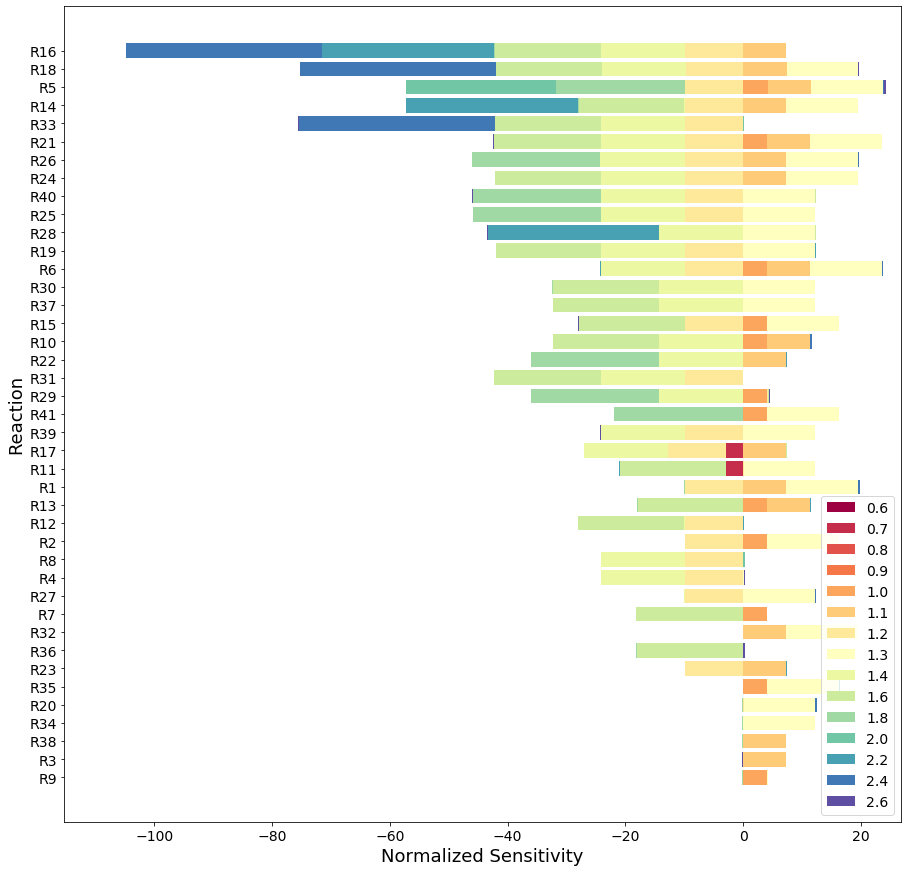

In [85]:
allPlot(normalized_sens_data, 'CH4 Conversion')

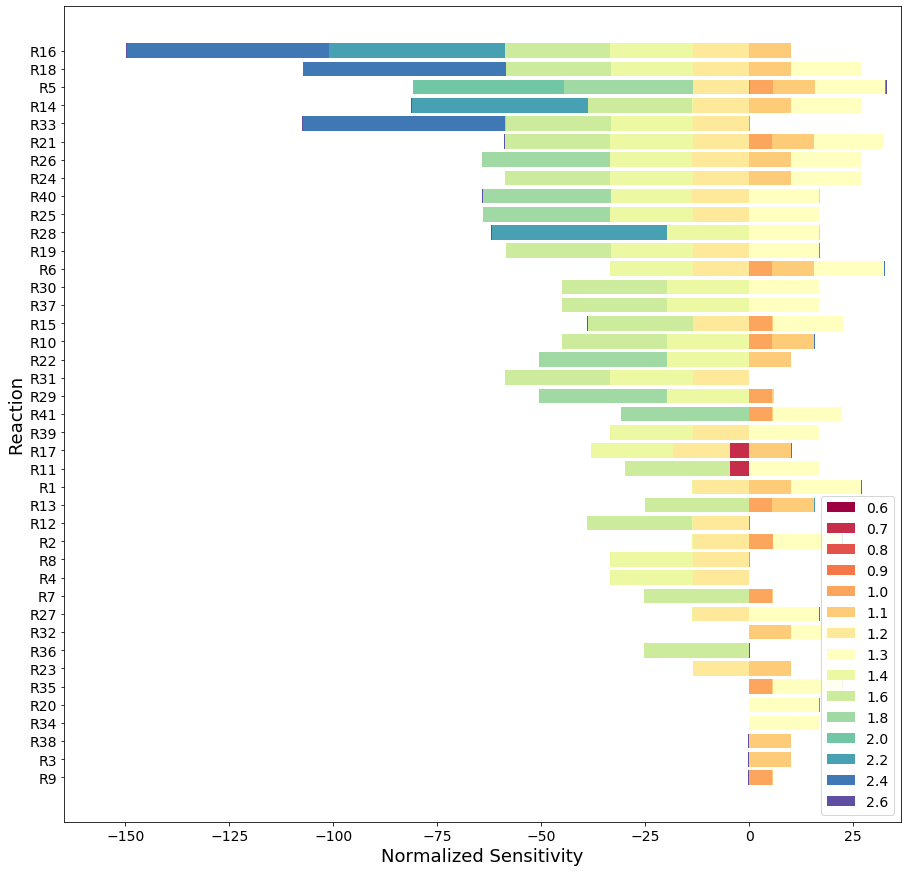

In [74]:
allPlot(normalized_sens_data, 'SynGas Yield')

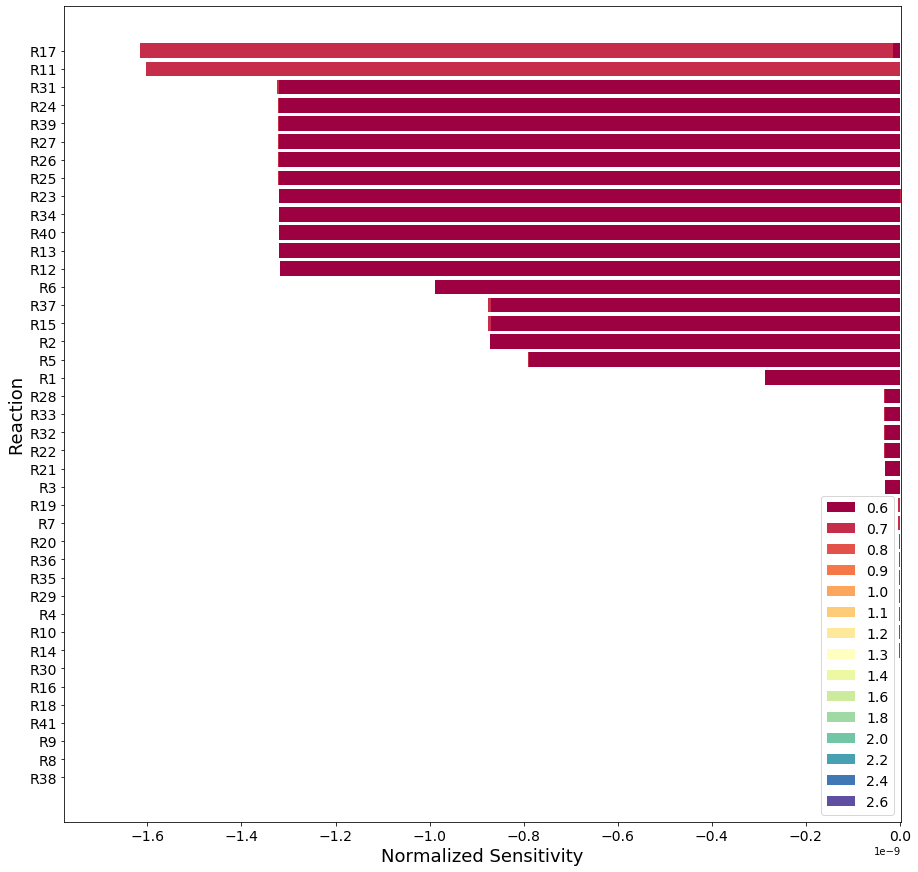

In [75]:
allPlot(normalized_sens_data, 'O2 Conversion')

['R2', '[H][H] + 2 [Pt] <=> 2 [Pt]', -0.002290369752289961, -0.00229036826200179, -0.000820264256837032, -0.0008202627665572299, -0.0041520141704000976, -0.004152012680117507, 1.490282620032958e-09, 0.007241223528084199, 0.007241225018366791, 0.0038233924136552872, 0.001164368921171861, 0.07879198428450339, -8.71256211276393e-10, nan]
nan
['R2', '[H][H] + 2 [Pt] <=> 2 [Pt]', 0.00016231533493604757, 0.00016255815466332697, 0.00016456429745651278, 0.0001648071171698451, 0.0001597823556929573, 0.00016002517541744728, 2.428197204255491e-07, -0.00029592349674110834, -0.00029568067701382894, -6.526689420867458e-05, -0.00017362970983901844, -0.0, 2.2315298677324882e-14, nan]
nan
['R2', '[H][H] + 2 [Pt] <=> 2 [Pt]', 7.592190095086999e-05, 5.448633454448706e-05, 8.376097200947781e-05, 6.232540560448961e-05, 6.771442779516463e-05, 4.627886139296583e-05, -2.1435566402896153e-05, -0.0003155761176676285, -0.0003370116840516961, -5.1852461135908895e-05, -0.00028313174485326446, -0.0, -0.0, nan]
nan


ValueError: shape mismatch: objects cannot be broadcast to a single shape

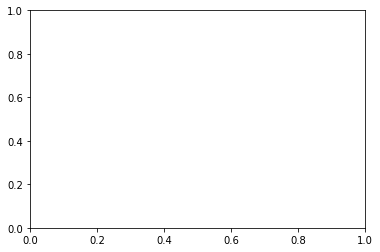

In [61]:
allPlot(normalized_sens_data, 'Max CH4 Conv')

In [62]:
allPlot(normalized_sens_data, 'Dist to 50 CH4 Conv')

['R2', '[H][H] + 2 [Pt] <=> 2 [Pt]', -0.002290369752289961, -0.00229036826200179, -0.000820264256837032, -0.0008202627665572299, -0.0041520141704000976, -0.004152012680117507, 1.490282620032958e-09, 0.007241223528084199, 0.007241225018366791, 0.0038233924136552872, 0.001164368921171861, 0.07879198428450339, -8.71256211276393e-10, nan]


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [52]:
ratio[sens_index_dict['Dist to 50 CH4 Conv'] + 2]

TypeError: 'int' object is not subscriptable

In [53]:
sens_index_dict

{'SynGas Selectivity': 0,
 'SynGas Yield': 1,
 'CO Selectivity': 2,
 'CO Yield': 3,
 'H2 Selectivity': 4,
 'H2 Yield': 5,
 'CH4 Conversion': 6,
 'CO2+H2O Selectivity': 7,
 'CO2+H2O Yield': 8,
 'Exit Temperature': 9,
 'Maximum Temperature': 10,
 'Dist to Max Temperature': 11,
 'O2 Conversion': 12,
 'Max CH4 Conv': 13,
 'Dist to 50 CH4 Conv': 14}

In [54]:
ratio

14